<a href="https://colab.research.google.com/github/Abhi3030/BasicPython/blob/main/Powerplant_Output_Prediction_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset preview:
      AT      V       AP     RH      PE
0  14.96  41.76  1024.07  73.17  463.26
1  25.18  62.96  1020.04  59.08  444.37
2   5.11  39.40  1012.16  92.14  488.56
3  20.86  57.32  1010.24  76.64  446.48
4  10.82  37.50  1009.23  96.62  473.90

Missing values in each column:
AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

Training and test set sizes:
X_train: (7654, 4) X_test: (1914, 4)

Linear Regression cross-validation RMSE scores: [4.64156573 4.72979675 4.4026227  4.51158878 4.5764124 ]
Average RMSE: 4.572397273712406

Random Forest cross-validation RMSE scores: [3.66349888 3.80288179 3.3784003  3.59586203 3.6804551 ]
Average RMSE: 3.624219620260688

Selected Model: Random Forest Regression (lower RMSE on CV)

Final Model Evaluation on Test Set:
RMSE: 3.46
MAE: 2.58
R²: 0.96


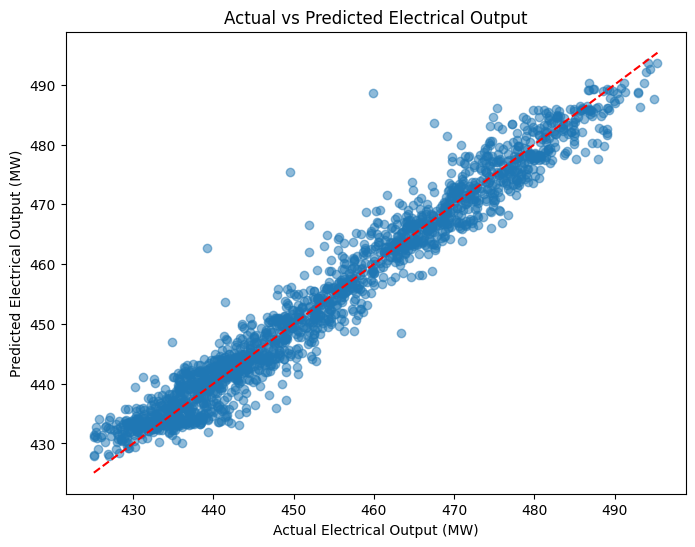

In [8]:
# Import necessary libraries for data manipulation, modeling, and visualization.
import pandas as pd                   # For loading and manipulating the data
import numpy as np                    # For numerical operations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt       # For plotting results

# --------------------------------------------------------------------------
# Modeling Approach:
#
# 1. Task Identification:
#    - We are predicting a continuous variable (net electrical energy output, PE),
#      which makes this a regression problem.
#
# 2. Feature Selection:
#    - Features used: Temperature (T), Ambient Pressure (AP), Relative Humidity (RH), and Exhaust Vacuum (V).
#    - Rationale: These ambient environmental measurements are directly related to the performance of the power plant.
#
# 3. Possible Algorithms:
#    - Baseline: Linear Regression, due to its simplicity and interpretability.
#    - Alternative: Random Forest Regression, an ensemble method capable of capturing non-linear relationships.
# --------------------------------------------------------------------------

# Load the dataset from the CSV file (ensure the file is uploaded to Colab)

data = pd.read_csv('/content/sample_data/CCPP_data.csv')
data

# Display the first few rows to understand the dataset
print("Dataset preview:")
print(data.head())

# Check for missing values to ensure data quality
print("\nMissing values in each column:")
print(data.isnull().sum())

# Define the independent features and the target variable.
feature_cols = ['AT', 'AP', 'RH', 'V']  # Ambient features measured by sensors
target_col = 'PE'                      # Target: Net hourly electrical energy output (MW)

# Separate features (X) and target (y)
X = data[feature_cols]
y = data[target_col]

# --------------------------------------------------------------------------
# Model Building:
#
# 1. Data Splitting:
#    - We reserve 20% of the data as a test set to evaluate the final model.
#    - Rationale: This helps us assess the model's generalization on unseen data.
#
# 2. Validation Strategy:
#    - Use 5-fold cross-validation on the training set.
#    - Rationale: Cross-validation provides a robust measure of model performance and avoids overfitting.
#
# 3. Model Comparison:
#    - Two models compared: Linear Regression and Random Forest Regression.
#    - Rationale: Linear Regression serves as a simple baseline, while Random Forest can handle non-linearities and interactions.
# --------------------------------------------------------------------------

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print("\nTraining and test set sizes:")
print("X_train:", X_train.shape, "X_test:", X_test.shape)

# Helper function to compute RMSE using cross-validation
def get_rmse_cv(model, X, y, cv=5):
    # Using negative mean squared error (MSE) for scoring, then take the square root to get RMSE.
    neg_mse_scores = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=cv)
    rmse_scores = np.sqrt(-neg_mse_scores)
    return rmse_scores

# -----------------------------
# Model 1: Linear Regression
# -----------------------------
lr_model = LinearRegression()

# Evaluate Linear Regression with 5-fold cross-validation
lr_rmse_scores = get_rmse_cv(lr_model, X_train, y_train, cv=5)
print("\nLinear Regression cross-validation RMSE scores:", lr_rmse_scores)
print("Average RMSE:", lr_rmse_scores.mean())

# -----------------------------
# Model 2: Random Forest Regression
# -----------------------------
# Setting hyperparameters: n_estimators=100 and max_depth=10 based on common defaults; these can be tuned further.
rf_model = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=10)

# Evaluate Random Forest using 5-fold cross-validation
rf_rmse_scores = get_rmse_cv(rf_model, X_train, y_train, cv=5)
print("\nRandom Forest cross-validation RMSE scores:", rf_rmse_scores)
print("Average RMSE:", rf_rmse_scores.mean())

# Compare the two models based on cross-validation RMSE scores.
# The model with the lower average RMSE is selected as the final model.
if rf_rmse_scores.mean() < lr_rmse_scores.mean():
    final_model = rf_model
    print("\nSelected Model: Random Forest Regression (lower RMSE on CV)")
else:
    final_model = lr_model
    print("\nSelected Model: Linear Regression (lower RMSE on CV)")

# --------------------------------------------------------------------------
# Model Evaluation:
#
# 1. Final Model Training:
#    - The selected model is trained on the entire training set.
#
# 2. Evaluation Metric:
#    - We use RMSE (Root Mean Squared Error) because it provides an error metric in the same units as the target.
#    - Additionally, MAE (Mean Absolute Error) and R² (Coefficient of Determination) are calculated for further insight.
# --------------------------------------------------------------------------

# Train the final selected model on the entire training set
final_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = final_model.predict(X_test)

# Compute evaluation metrics on the test set
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
test_mae = mean_absolute_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

print("\nFinal Model Evaluation on Test Set:")
print("RMSE: {:.2f}".format(test_rmse))
print("MAE: {:.2f}".format(test_mae))
print("R²: {:.2f}".format(test_r2))

# --------------------------------------------------------------------------
# Model Interpretation:
#
# 1. Communicating Performance:
#    - The test set metrics (RMSE, MAE, and R²) are printed to provide a clear evaluation of the model's performance.
#    - Rationale: RMSE indicates the average prediction error in MW, MAE shows average absolute error, and R² reflects the proportion of variance explained.
#
# 2. Visual Analysis:
#    - A scatter plot of actual vs. predicted values is generated to visually assess model accuracy.
#    - Rationale: Visualization helps to identify any systematic errors and gives an intuitive understanding of model performance.
# --------------------------------------------------------------------------

# Optional: Plotting actual vs. predicted values for visual interpretation
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Electrical Output (MW)")
plt.ylabel("Predicted Electrical Output (MW)")
plt.title("Actual vs Predicted Electrical Output")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line represents perfect prediction
plt.show()
